In [281]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("./housing.csv", delimiter=";")

df.copy()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11930.0,0,0.573,65930,69.1,24786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11930.0,0,0.573,61200,76.7,22875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11930.0,0,0.573,69760,91.0,21675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11930.0,0,0.573,67940,89.3,23889,1,273,21.0,393.45,6.48,22.0


In [282]:
df.copy().describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.486526e+05,11.363636,11134.409486,0.069170,0.554695,62846.343874,68.574901,37950.426877,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.650846e+05,23.322453,6864.095557,0.253994,0.115878,7026.171434,28.148861,21057.101266,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,6.320000e-03,0.000000,0.460000,0.000000,0.385000,35610.000000,2.900000,11296.000000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,8.204500e-02,0.000000,5190.000000,0.000000,0.449000,58855.000000,45.025000,21001.750000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,2.565100e-01,0.000000,9690.000000,0.000000,0.538000,62085.000000,77.500000,32074.500000,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082e+05,12.500000,18100.000000,0.000000,0.624000,66235.000000,94.075000,51884.250000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,8.897620e+06,100.000000,27740.000000,1.000000,0.871000,87800.000000,100.000000,121265.000000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [283]:
df.copy().isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [284]:
from sklearn.preprocessing import StandardScaler

features = df.columns.difference(["MEDV"])

df.convert_dtypes()

df[features] = StandardScaler().fit_transform(df[features])

In [285]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# apply PCA to see variance by feature
pca = PCA(n_components=len(features))
pca.fit(df[features])
variance_df = pd.DataFrame()
variance_df["variance"] = pca.explained_variance_
variance_df["headers"] = df[features].columns.values
variance_df.copy()

# get actual variance by feature and store in deltas
variance_array = list(reversed(list(variance_df["variance"])))
variance_by_feature = []
for index, variance in enumerate(variance_array):
    variance_by_feature.append(variance - sum(variance_by_feature))
variance_df["deltas"] = variance_by_feature

# sort rows by variance, higher first
variance_df.sort_values("deltas", ascending=False, inplace=True)

print(variance_df)

# keep top 5 features that provide more variance
df.drop(variance_df.tail(len(variance_by_feature) - 5)["headers"], inplace=True, axis=1)

    variance  headers    deltas
12  0.063617       ZN  4.700701
10  0.186433       RM  0.387267
11  0.169540      TAX  0.192572
8   0.277141  PTRATIO  0.177451
6   0.528864    LSTAT  0.131321
7   0.397543      NOX  0.130378
5   0.659242    INDUS  0.120402
1   1.439413        B  0.105923
0   6.140115      AGE  0.063617
4   0.836693      DIS  0.056415
3   0.859575     CRIM  0.034293
9   0.220726      RAD  0.022882
2   1.246842     CHAS  0.016893


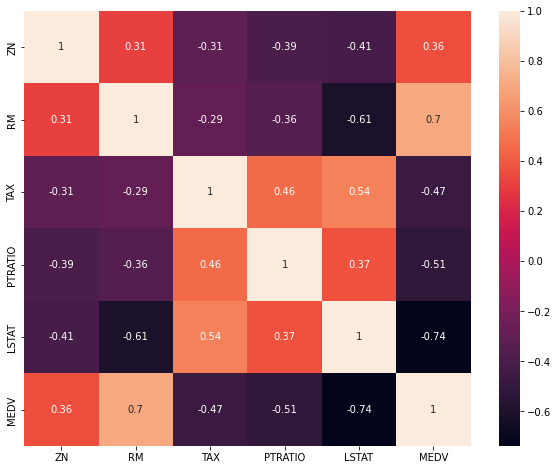

In [286]:
correlation_matrix = df[df.columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True);

Training score: 0.6500236136614277
Test score: 0.6112302519836519


<AxesSubplot:xlabel='MEDV'>

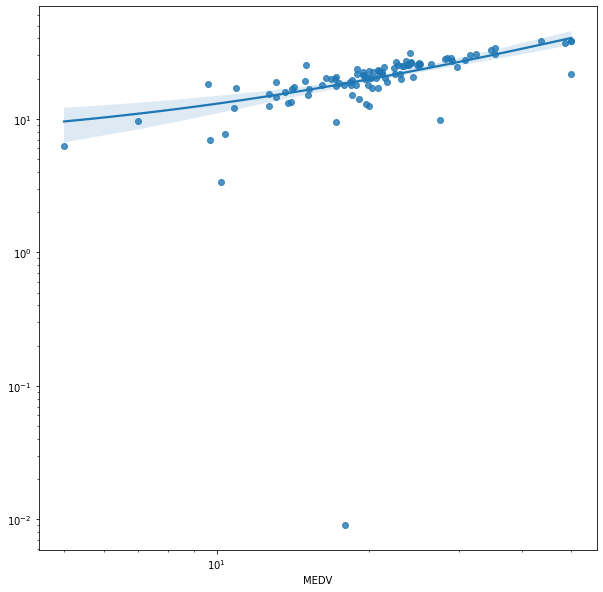

In [287]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

features = df.columns.difference(["MEDV"])

X_train, X_test, y_train, y_test = train_test_split(df[features], df["MEDV"], test_size=0.20, shuffle=True, random_state=42)


lr = LinearRegression(n_jobs=-1)

scores = cross_val_score(lr, X_train, y_train, cv=10)
print(f"Training score: {scores.mean()}")

lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
print(f"Test score: {test_score}")

# plot results
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")
sns.regplot(x=y_test, y=lr.predict(X_test), ax=ax)

Training score: 0.7741571477196598
Test score: 0.8091669221662323


<AxesSubplot:xlabel='MEDV'>

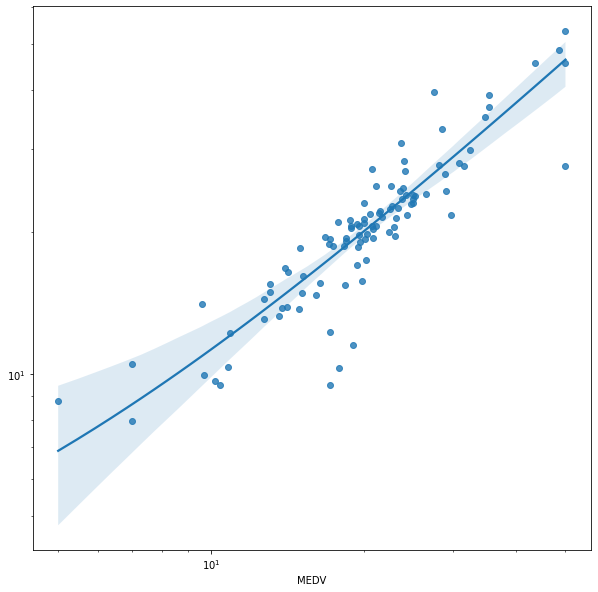

In [288]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

scores = cross_val_score(model, X_train, y_train, cv=10)
print(f"Training score: {scores.mean()}")

model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
print(f"Test score: {test_score}")

# plot results
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")
sns.regplot(x=y_test, y=model.predict(X_test), ax=ax)

In [289]:
from sklearn.neighbors import LocalOutlierFactor

features = df.columns.difference(["MEDV"])

outliers = LocalOutlierFactor(n_neighbors=20).fit_predict(df)
print(f"Outliers found: {len([x for x in outliers if x == -1])}")

df["OUTLIER"] = outliers
df.drop(df[df.OUTLIER == -1].index, inplace=True)
df.drop(["OUTLIER"], inplace=True, axis=1)

Outliers found: 14


Training score: 0.8361320453479205
Test score: 0.8594674840253899


<AxesSubplot:xlabel='MEDV'>

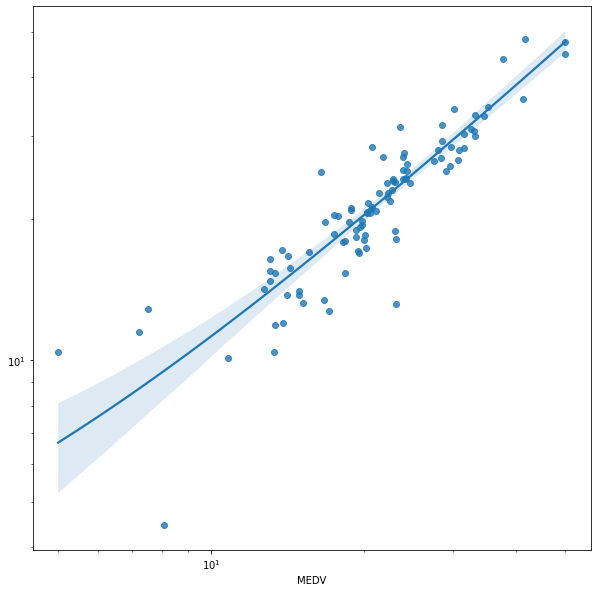

In [290]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["MEDV"], test_size=0.20, shuffle=True, random_state=42)

model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

scores = cross_val_score(model, X_train, y_train, cv=10)
print(f"Training score: {scores.mean()}")

model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
print(f"Test score: {test_score}")

# plot results
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")
sns.regplot(x=y_test, y=model.predict(X_test), ax=ax)